In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=10,6

In [2]:
dataset=pd.read_csv("C://Users/user/Downloads/data science/ML.Algorithams/TimeSeries/AirPassengers.csv")

In [3]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)

In [5]:
dataset

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [6]:
indexedDataset=dataset.set_index(['Month'])

In [7]:
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
from datetime import datetime

In [9]:
indexedDataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


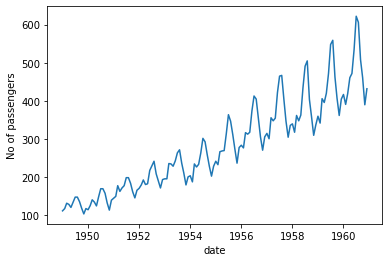

In [10]:
plt.xlabel("date")
plt.ylabel("No of passengers")
plt.plot(indexedDataset)

In [11]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


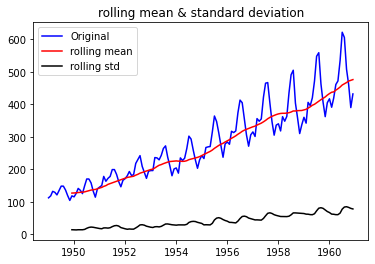

In [12]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title("rolling mean & standard deviation")
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

print("Results o dickey fuller test:")
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','Pvalue','Lagsused','no of obs used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results o dickey fuller test:
Test Statistic            0.815369
Pvalue                    0.991880
Lagsused                 13.000000
no of obs used          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


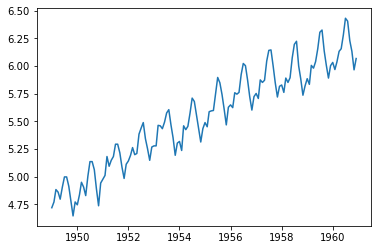

In [14]:
#estimate trend
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

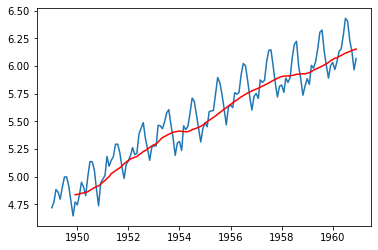

In [15]:
movingaverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage,color='red')

In [16]:
datasetlogscaleminusmovingaverage = indexedDataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.head(12)

datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()

    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingaverage,color='red',label='rolling mean')
    std=plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title("rolling mean & standard deviation")
    plt.show(block=False)

#perform dickey fuller test
    print("Results o dickey fuller test:")
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','Pvalue','Lagsused','no of obs used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

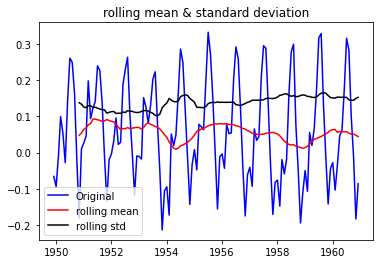

Results o dickey fuller test:
Test Statistic           -3.162908
Pvalue                    0.022235
Lagsused                 13.000000
no of obs used          119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [18]:
test_stationarity(datasetlogscaleminusmovingaverage)

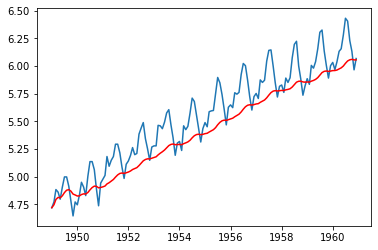

In [19]:
exponentialdecayweightedaverage = indexedDataset_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialdecayweightedaverage,color='red')

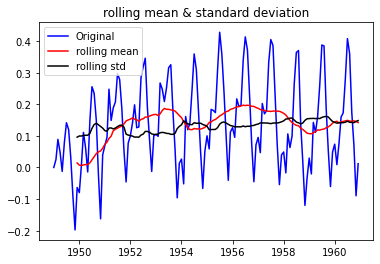

Results o dickey fuller test:
Test Statistic           -3.601262
Pvalue                    0.005737
Lagsused                 13.000000
no of obs used          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [24]:
datasetlogscaleminusmovingexpoentialaverage = indexedDataset_logscale - exponentialdecayweightedaverage
test_stationarity(datasetlogscaleminusmovingexpoentialaverage)

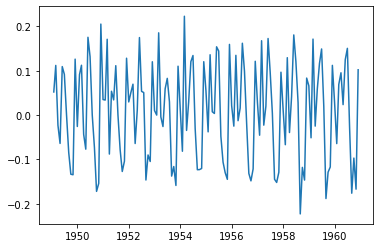

In [25]:
datasetlogdiffshifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

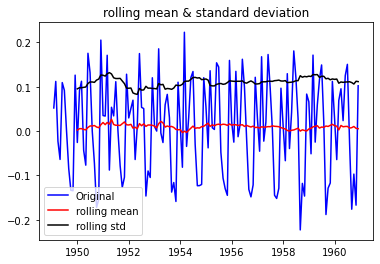

Results o dickey fuller test:
Test Statistic           -2.717131
Pvalue                    0.071121
Lagsused                 14.000000
no of obs used          128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [26]:
datasetlogdiffshifting.dropna(inplace=True)
test_stationarity(datasetlogdiffshifting)

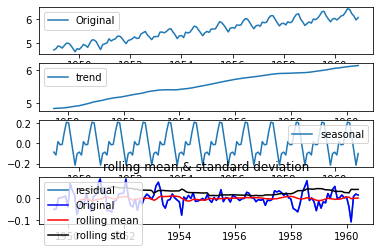

Results o dickey fuller test:
Test Statistic         -6.332387e+00
Pvalue                  2.885059e-08
Lagsused                9.000000e+00
no of obs used          1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

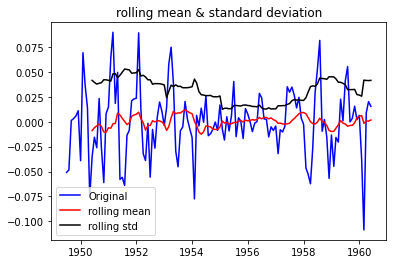

Results o dickey fuller test:
Test Statistic         -6.332387e+00
Pvalue                  2.885059e-08
Lagsused                9.000000e+00
no of obs used          1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [28]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Auto correlation function')

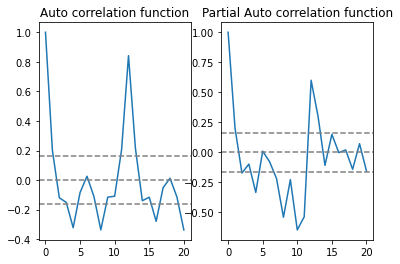

In [33]:
#ACF and PACF grphs
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogdiffshifting, nlags=20)
lag_pacf = pacf(datasetlogdiffshifting, nlags=20,method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='grey')
plt.title("Auto correlation function")

#plot pcaf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='grey')
plt.title("Partial Auto correlation function")


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


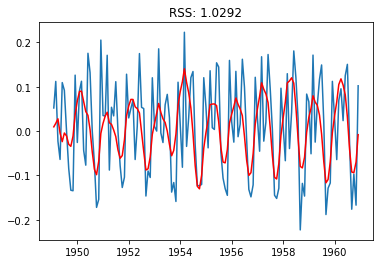

In [38]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logscale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))
print("plotting AR model")

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


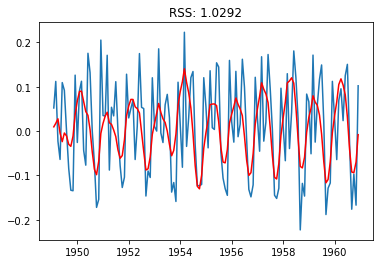

In [41]:
#MA MODEL
model = ARIMA(indexedDataset_logscale,order=(2,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))
print("plotting AR model")

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


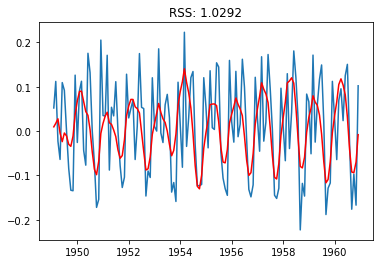

In [47]:
model = ARIMA(indexedDataset_logscale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))
print("plotting AR model")

In [48]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [49]:
predictions_ARIMA_diff_cumsum= predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [54]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'],index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

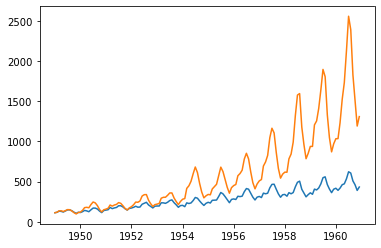

In [55]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [56]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


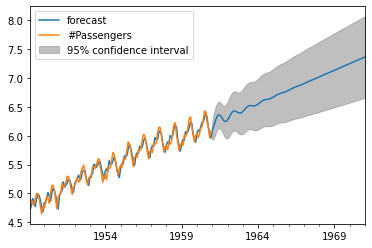

In [57]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

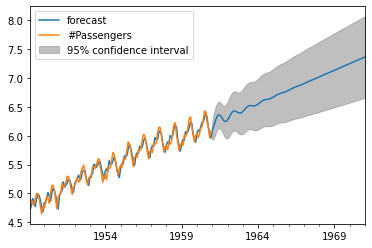

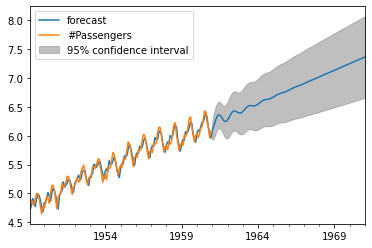

In [58]:
results_ARIMA.plot_predict(1,264)


In [59]:
x=results_ARIMA.forecast(steps=120)

In [60]:
x

(array([6.09553395, 6.15281405, 6.22442965, 6.29241096, 6.34164706,
        6.36359348, 6.35784672, 6.33139293, 6.29597534, 6.26447712,
        6.24738328, 6.25025174, 6.27275836, 6.30940308, 6.35151483,
        6.3898864 , 6.41727363, 6.43011035, 6.42906673, 6.41842477,
        6.40456147, 6.39403612, 6.3918308 , 6.400195  , 6.41833686,
        6.44295397, 6.4693742 , 6.49293967, 6.51024099, 6.51989013,
        6.52267561, 6.52112373, 6.51864516, 6.51853681, 6.52311914,
        6.53322351, 6.54812858, 6.56591542, 6.5841029 , 6.60036519,
        6.61313245, 6.6219276 , 6.62737769, 6.63093111, 6.63438674,
        6.63937971, 6.64696491, 6.65739826, 6.67015308, 6.68414232,
        6.69806605, 6.71077878, 6.72157709, 6.73033961, 6.73749789,
        6.74386358, 6.75037303, 6.75782574, 6.76668663, 6.77699803,
        6.78841298, 6.80032831, 6.8120717 , 6.82308735, 6.8330711 ,
        6.84202467, 6.85022287, 6.85811197, 6.86617316, 6.87479128,
        6.88416279, 6.89426359, 6.90487864, 6.91